# Exercise 3: Linear Support Vector Machines


## I. GOAL OF THE EXERCISE

The main goal is to understand the SVM classifier and the particularities of the solution achieved. For that purpose we will code the linear SVM from scratch using a QP solver at the optimization step.

## II. DELIVERABLES
As you progress in this exercise, you will find several questions. You are expected to answer them properly with adequate figures when required and deliver a document with all these evidences in due time. A file or files with the working code used for generating and discussing the results must be also delivered.




<div class = "alert alert-danger" style="border-radius:10px"> **IMPORTANT:** Write in the next cell the name of the people that answer this notebook
</div>

## Felix Altenberger, Pablo Reynoso, Emanuel Sanchez

In this exercise we will use a convex optimization solver (cvxpy) so we won't need to code the optimization process. You can find the installation instructions at

http://www.cvxpy.org/en/latest/




## III. CODE DESIGN

All classifiers must be coded from scratch, no toolkits are allowed to be used except for CVX (see details in the next section). 

## IV. INTRODUCTION TO THE TOOLS

The support vector machine defines a quadratic programming problem. Solving efficiently the problem is out of the scope of this course. For this reason, you are welcomed to use CVX convex optimization toolbox (http://www.cvxpy.org/en/latest/). This toolbox allows to solve many convex optimization problems of medium size, i.e. linear, quadratic, cone, geometric and semi-definite programming problems. The toolbox allows to use user friendly notation for writing the convex optimization problem. E.g. given the following problem

$$
\begin{align}
\underset{x}{\text{minimize}} & \quad \|Ax-b\|^2\\
\text{subject to} & \quad \|x\|_{\infty}\leq 1
\end{align}
$$


the next CVX code corresponds to the optimization of the former problem:

In [1]:
%reset -f
from cvxpy import *
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
C = np.random.randn(m, n)
b = np.random.randn(m)
d = np.random.randn(m)

# Construct the problem.
x = Variable(n)
objective = Minimize(sum_squares(A*x - b))
constraints = [norm(x,"inf") <= 1]
prob = Problem(objective, constraints)


# The optimal objective is returned by prob.solve().
result = prob.solve()
# The optimal value for x is stored in x.value.
print x.value
# Check the status of the solution (Infeasible, Optimal)
print prob.status

[[ -3.61521683e-01]
 [ -1.00536841e-01]
 [ -2.03715673e-01]
 [  6.47675677e-01]
 [  2.15494699e-02]
 [ -1.64647638e-01]
 [  1.72390951e-01]
 [ -1.32485453e-01]
 [ -9.79805727e-02]
 [ -2.93714491e-01]
 [ -9.24897392e-02]
 [  2.59491849e-01]
 [ -7.37552869e-05]
 [  2.26570029e-01]
 [  3.78736989e-01]
 [  2.10573911e-01]
 [ -9.59563032e-02]
 [ -3.51321870e-01]
 [  1.81990979e-01]
 [  2.09077202e-01]]
optimal


Please, refer to the reference documentation for additional details. 

<div class = "alert alert-info" style = "border-radius:10px">
**HINTS: ** Some operations are overridden such as `*` that performs matrix multiplication. If you need to do an element-wise multiplication you can use `mul_elemwise`. Additionally, `sum_entries` and `norm` can be useful for your code development.
</div>


## V. UNDERSTANDING SUPPORT VECTOR MACHINES
### A. Understanding the primal
Code the primal problem for hard margin linear SVM (i.e. without slack variables) using CVX. It is recommended to clear your workspace before running the CVX code.

The primal problem hard margin linear SVM is 

$$
\begin{align}
\underset{a,b}{\text{minimize}} & \quad \|a\|_2\\
\text{subject to} & \quad y_i (a^Tx_i+ b) \geq 1, \forall i
\end{align}
$$

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 1:**
<ol>
<li>Load the dataset `example_dataset_1.mat`.</li>
<li>Run your training algorithm on that dataset.</li>
<li>Plot the dataset and the separating hyperplane.</li>
<li>Identify the support vectors and explain how you know they are support vectors.</li>
</ol>

</div>


[[ 7.69503545]
 [-4.85106382]] 0.975177304056 optimal


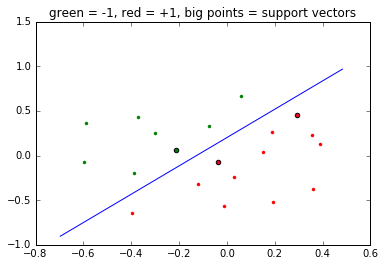

In [2]:
#1.
%reset -f
import scipy.io as sio
data = sio.loadmat('example_dataset_1.mat')
X = data['data'].T
y = data['labels'].astype(float)
n = X.shape[0]

#2.
from cvxpy import *
import numpy as np
#define variables
a = Variable(X.shape[1])
b = Variable(1)
#construct problem and solve it
objective = Minimize(norm(a))
constraints = [mul_elemwise(y,(a.T*X.T+b).T) >= 1]
prob = Problem(objective, constraints)
result = prob.solve()
print a.value, b.value, prob.status
av = np.array([np.array(a_val)[0][0] for a_val in a.value])
bv = b.value

#3.
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('green = -1, red = +1, big points = support vectors')
#split X into two sets depending on their class
l,s = len(y),sum(y)[0]
#the array lengths are calculated by solving (a+b=l, a-b=s) with a=#pos, b=#neg
X_pos, X_neg = [0]*int(0.5*(l+s)),[0]*int(0.5*(l-s))
pos_count, neg_count = 0,0
for i in range(n):
    if y[i] == 1:
        X_pos[pos_count]=X[i]
        pos_count += 1
    elif y[i] == -1:
        X_neg[neg_count]=X[i]
        neg_count += 1
X_pos, X_neg = np.array(X_pos), np.array(X_neg)
#plot both classes in different colors together with the hyperplane
plt.plot(X_pos.T[0],X_pos.T[1], '.r')
plt.plot(X_neg.T[0],X_neg.T[1], '.g')
x_plot = np.arange(np.min(X.T[0])-0.1,np.max(X.T[0])+0.1,0.02)
def f(x):
    return -((bv+av[0]*x)/av[1])
plt.plot(x_plot, f(x_plot))

#4. 
def calc_d(x):     
    return round(np.absolute(np.dot(av,x)+bv),5)
svs = np.array(filter(lambda x: calc_d(x)<=1.0, X))
plt.scatter(svs.T[0], svs.T[1])
#print svs
    

The support vectors are [-0.21428571 0.06725146], [-0.03917051 -0.06725146] and [0.29262673 0.45906433] (big points in the graph). They are support vectors, because they have the minimum distance (1) to the seperating hyperplane.

### B. Soft-margin linear SVM

Code the primal problem for the soft-margin linear SVM using CVX. The soft-margin linear SVM is as follows

$$
\begin{align}
\underset{a,b}{\text{minimize}} & \quad \|a\|_2 + C \sum_i \xi_i\\
\text{subject to} & \quad y_i (a^Tx_i+ b) \geq 1 - \xi_i, \forall i\\
& \quad \xi_i \geq 0
\end{align}
$$

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 2:**
<ol>
<li>Load the dataset ’example_dataset_1.mat’.</li>
<li>Consider the soft-margin formulation for C = 0. Is it reasonable to think that the
resulting hyperplane should be very similar to the case of hard-margin SVM in
a separable problem? Why?</li>
<li>Run the training algorithm for non-separable datasets with C=0. Plot the dataset
and the separating hyperplane. What do you observe? Hypothesize a reasonable
explanation.</li>
<li>Plot the dataset and the separating hyperplane when training with C = 1e − 2,
C=1 and C=1e2.</li>
<li>Which is the expected value of $\xi_i$ for the support vectors with margin equals 1?</li>
<li>Observe the values of $\xi_i$ for $C = 1$. Can you identify the SVs by observing
those values? Describe the rule you use for identifying them.</li>
</ol>
</div>

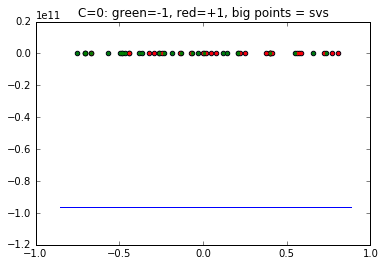

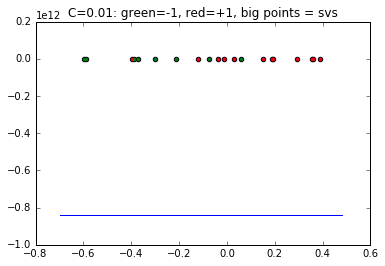

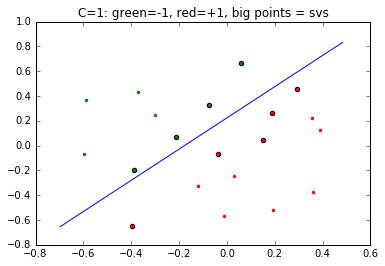

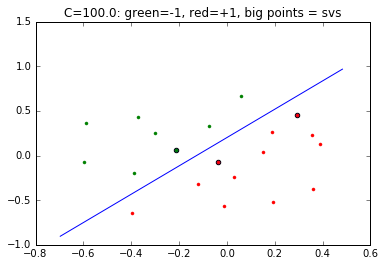

In [3]:
%reset -f
import scipy.io as sio
from cvxpy import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def SVM(filename, c, figNum):
    data = sio.loadmat(filename)
    X = data['data'].T
    y = data['labels'].astype(float)
    n = X.shape[0]
    
    #construct and solve problem
    a = Variable(X.shape[1])
    b = Variable(1)
    eps = Variable(n)
    C = Parameter(sign="positive")
    objective = Minimize(norm(a)+C*sum(eps))
    constraints = [mul_elemwise(y,(a.T*X.T+b).T)+eps >= 1, eps >= 0]
    prob = Problem(objective, constraints)
    C.value = c
    result = prob.solve()
    av = np.array([np.array(a_val)[0][0] for a_val in a.value])
    bv = b.value
    
    #plot solution
    plt.figure(figNum)
    plt.title('C='+str(c)+': green=-1, red=+1, big points = svs')
    #split X into two sets depending on their class
    l,s = len(y),sum(y)[0]
    #the array lengths are calculated by solving (a+b=l, a-b=s) with a=#pos, b=#neg
    X_pos, X_neg = [0]*int(0.5*(l+s)),[0]*int(0.5*(l-s))
    pos_count, neg_count = 0,0
    for i in range(n):
        if y[i] == 1:
            X_pos[pos_count]=X[i]
            pos_count += 1
        elif y[i] == -1:
            X_neg[neg_count]=X[i]
            neg_count += 1
    X_pos, X_neg = np.array(X_pos), np.array(X_neg)
    #plot both classes in different colors together with the hyperplane
    plt.plot(X_pos.T[0],X_pos.T[1], '.r')
    plt.plot(X_neg.T[0],X_neg.T[1], '.g')
    x_plot = np.arange(np.min(X.T[0])-0.1,np.max(X.T[0])+0.1,0.02)
    def f(x):
        return -((bv+av[0]*x)/av[1])
    plt.plot(x_plot, f(x_plot))

    
    #calculate and plot support vectors
    def calc_d(x,y):     
        return round(y*(np.dot(av,x)+bv),5)
    #svs = np.array(filter(lambda x: calc_d(x,-1)<1, X))
    count = 0
    for i in range(n):
        if calc_d(X[i],y[i])<=1:
            count += 1
    svs = [0]*count
    count = 0
    for i in range(n):
        if calc_d(X[i],y[i])<=1:
            svs[count]=X[i]
            count += 1
    svs = np.array(svs).T
    plt.scatter(svs[0], svs[1])
    return [round(ev,5) for ev in eps.value], svs.T
    
#2.
eps, svs = SVM('example_dataset_2.mat',0,0)
#1., 4., 6.
eps, svs = SVM('example_dataset_1.mat',1e-2,1)
eps, svs = SVM('example_dataset_1.mat',1,2)
#print eps
#print svs
eps, svs = SVM('example_dataset_1.mat',1e2,3)

1. see code
2. The resulting hyperplane should be very different from the hard-margin case. The reason for this is that the epsilons are not affecting the term that is being minimized, so making them as big as possible will have the upside of having a weaker condition and no down side. Therefore the epsilons will be very big for which reason the values for 'a' and 'b' are basically freely choosable which will result in values very close to 0 for 'a' due to the minimzation of it.
3. As we expected, the support vector just sets 'a' to zero and does not care about the classification error. It is interesting though that an optimal solution is even being found.
4. see above
5. If the margin of a support vector is equal to 1 (or greater), the corresponding epsilon has to be 0.
6. The values of epsilon are [-0.0, -0.0, -0.0, 0.69133, 0.80767, 0.44891, -0.0, 0.0, 0.0, -0.0, -0.0, 0.3442, 0.4779, -0.0, -0.0, 0.63991, -0.0, -0.0, -0.0, -0.0]. Therefore we conclude that [-0.21428571 0.06725146], [-0.38940092 -0.19590643], [-0.07603687 0.33040936], [-0.03917051 -0.06725146], [0.18663594 0.26608187] and [0.29262673 0.45906433] are support vectors, since their corresponding epsilon value is greater than zero. However there are also 3 other support vectors with margin=1 which we cannot recognize by simply looking at epsilon.

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 3:**
<ol>
<li>Load the dataset ’example_dataset_2.mat’.</li>
<li>Run your training algorithm on that dataset for C = 1e−2, C = 1 and C = 1e2.</li>
<li>Plot the dataset and the separating hyperplane for each value of lambda.</li>
<li>Observe the values of ui for C = 100. Can you identify the SVs simply by
observing those values? Describe the rule you use for identifying them.</li>
</ol>
</div>


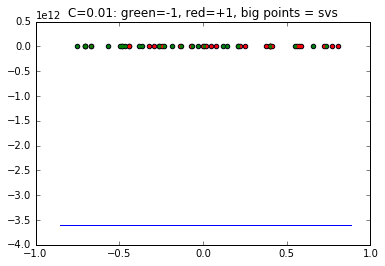

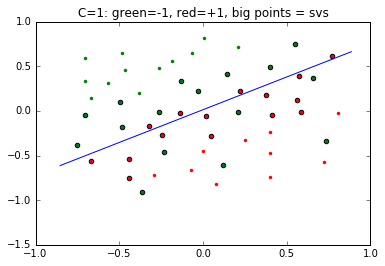

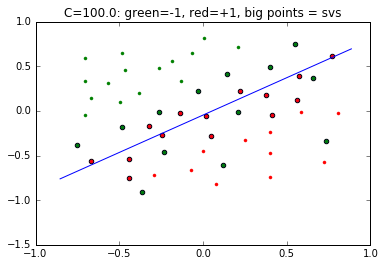

In [4]:
eps, svs = SVM('example_dataset_2.mat',1e-2,0)
eps, svs = SVM('example_dataset_2.mat',1,1)
eps, svs = SVM('example_dataset_2.mat',1e2,2)
#print eps
#print svs
#print len(svs)

The epsilon values are: [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.23895, -0.0, 0.13797, 0.21065, -0.0, 0.42066, 0.14712, 0.01184, 1.40041, 1.40096, 2.94868, 1.6523, 2.61947, 3.6622, -0.0, 1.14574, -0.0, 1.41742, 0.9632, 1.41095, 0.93601, -0.0, -0.0, 0.74034, 0.8882, 1.05317, -0.0, -0.0, 0.12382, -0.0, -0.0, -0.0, -0.0, -0.0, 0.63298, 0.0, 0.18985, -0.0, 1.26077, -0.0].
Therefore we can conclude that there are at least 24 support vectors. In reality there are 27 (3 of them have margin 1).
The rule for identifying the svs is the same as before: If epsilon is greater than 0, the corresponding vector is a support vector.

## C. Unbalanced data
In this section we will vary the formulation of SVM to handle unbalanced data. Suppose that in this problem data with label −1 is critical, e.g. examples from a rare disease, machine failure, etc.

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 4:**
<ol>
<li>Load the dataset ’example_dataset_3.mat’.</li>
<li>Check how many examples we have for each class. Is the problem unbalanced?
Why?</li>

<li>Search for the optimum value of C for this problem. Plot the separating
hyperplane and justify your choice of C.</li>

<li>Is the result satisfying? Why?</li>
<li>Compute and report the training error rate.</li>
</ol>
</div>


110 13
0.0569105691057


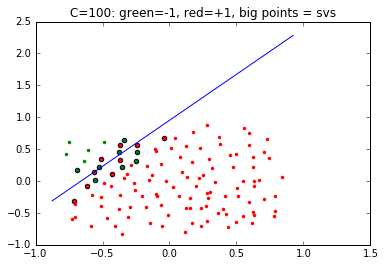

In [5]:
#1.
data = sio.loadmat('example_dataset_3.mat')
X = data['data'].T
y = data['labels'].astype(float)
n = X.shape[0]
#2.
from functools import reduce
y_pos = int(0.5*reduce((lambda x, y: x+y+1),np.append([[0]],y)))
print y_pos, n-y_pos

#3. - todo
for i in range(10):
    #SVM('example_dataset_3.mat',i,i)
    c = 0
c = 100

#5.
def error(eps):
    errs = filter(lambda x: x>1, eps)
    return 1.0*len(errs)/n
eps, svs = SVM('example_dataset_3.mat',c,10)
print error(eps)

1. See code
2. There are 110 examples for class +1 and 13 for class -1. Therefore the problem is unbalanced, since the cardinality of the one class is almost ten times as high as the cardinality of the other one.
3. The optimal choice of C is todo
4. The result is not satisfying, since 4 of the 13 important cases are missclassified.
5. The overall error rate on the training data however is 0.0569105691057, which is very low.

In general, the cost of an error in a critical class is set by the user/client according to the application. However if we don’t have a priori knowledge it is sensible to use a balancing weight so that an error on the majority class has less importance. A possible balancing weight is to use the quotient between the cardinality of the minority class set over the cardinality of the majority class set.

**HINT: ** We can divide the original SVM optimization problem in the following:

$$
\begin{align}
\underset{a,b}{\text{minimize}} & \quad \|a\|_2 + C (\sum_i u_i + \sum_i v_i),\\
\text{subject to} & \quad a^Tx_i+ b \geq 1 - u_i, \; i: y_i = +1,\\
& \quad a^Tx_i+ b \leq -1 + v_i, \; i: y_i = -1,\\ 
& \quad u_i\geq 0,\\
& \quad v_i\geq 0.
\end{align}
$$

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 5:**
<ol>
<li>Modify your code to take into account balancing weights between the misclassifications of class +1 and class -1. This weight value must trade-off both misclassification errors. Hint: instead of using the compact constraint $y_i(a^T x_i + b) \geq 1 − \xi_i$, use separate constraints for the class +1 and −1. Look at the first slides regarding A convex optimization view to linear classification.</li>

<li> Set the balancing weights so that one error in the minority class accounts for the ratio between the majority and the minority classes. Search for the optimum value of C for this problem. Plot the separating hyperplane and justify your choice of C.</li>

<li>Is the result satisfying? Why?</li>

<li>Compute and report the error rate. Is this error rate smaller than the one obtained
in block 4? Why?</li>

<li>Use the balancing weight to define a weighted error rate and compute the weighed
training error rates for the models in block 4. Is this error rate smaller than the weighed error for the model in block 4? Why?</li>
</ol>
</div>


0.0569105691057 0.167482517483
0.105691056911 0.0590909090909


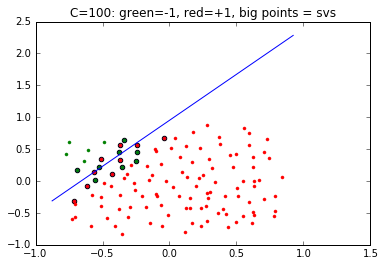

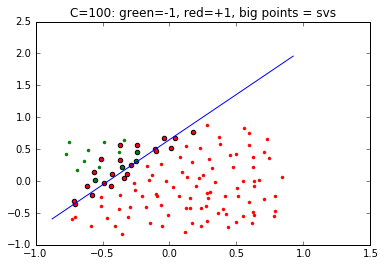

In [79]:
%reset -f
import scipy.io as sio
from cvxpy import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from functools import reduce

#1.
def SVM(filename, c, alp, figNum):
    data = sio.loadmat(filename)
    X = data['data'].T
    y = data['labels'].astype(float)
    n = X.shape[0]
    nn = n-int(0.5*reduce((lambda x, y: x+y+1),np.append([[0]],y)))

    #construct and solve problem
    a = Variable(X.shape[1])
    b = Variable(1)
    u = Variable(n-nn)
    v = Variable(nn)
    alpha = Parameter(sign="positive")
    C = Parameter(sign="positive")
    objective = Minimize(norm(a)+C*(alpha*sum(u)+(1-alpha)*sum(v)))
    constraints = [a.T*X[nn:].T+b >= 1-u.T, a.T*X[:nn].T+b <= v.T-1, u >= 0, v>= 0]
    prob = Problem(objective, constraints)
    C.value = c
    alpha.value = alp
    result = prob.solve()
    av = np.array([np.array(a_val)[0][0] for a_val in a.value])
    bv = b.value
    #print av, bv, prob.status
    
    #plot solution
    plt.figure(figNum)
    plt.title('C='+str(c)+': green=-1, red=+1, big points = svs')
    #split X into two sets depending on their class
    l,s = len(y),sum(y)[0]
    #the array lengths are calculated by solving (a+b=l, a-b=s) with a=#pos, b=#neg
    X_pos, X_neg = [0]*int(0.5*(l+s)),[0]*int(0.5*(l-s))
    pos_count, neg_count = 0,0
    for i in range(n):
        if y[i] == 1:
            X_pos[pos_count]=X[i]
            pos_count += 1
        elif y[i] == -1:
            X_neg[neg_count]=X[i]
            neg_count += 1
    X_pos, X_neg = np.array(X_pos), np.array(X_neg)
    #plot both classes in different colors together with the hyperplane
    plt.plot(X_pos.T[0],X_pos.T[1], '.r')
    plt.plot(X_neg.T[0],X_neg.T[1], '.g')
    x_plot = np.arange(np.min(X.T[0])-0.1,np.max(X.T[0])+0.1,0.02)
    def f(x):
        return -((bv+av[0]*x)/av[1])
    plt.plot(x_plot, f(x_plot))

    
    #calculate and plot support vectors
    def calc_d(x,y):     
        return round(y*(np.dot(av,x)+bv),5)
    #svs = np.array(filter(lambda x: calc_d(x,-1)<1, X))
    count = 0
    for i in range(n):
        if calc_d(X[i],y[i])<=1:
            count += 1
    svs = [0]*count
    count = 0
    for i in range(n):
        if calc_d(X[i],y[i])<=1:
            svs[count]=X[i]
            count += 1
    svs = np.array(svs).T
    plt.scatter(svs[0], svs[1])
    return [round(uv,5) for uv in u.value],[round(vv,5) for vv in v.value]

#4.
def error(u,v):
    errs_u, errs_v = filter(lambda x: x>1, u), filter(lambda x: x>1, v)
    return 1.0*(len(errs_u)+len(errs_v))/n

#5.
def error_weighted(u,v):
    errs_u, errs_v = filter(lambda x: x>1, u), filter(lambda x: x>1, v)
    return 1.0*(len(v)*len(errs_u)+len(u)*len(errs_v))/(2*len(u)*len(v))

#2.
data = sio.loadmat('example_dataset_3.mat')
X = data['data'].T
y = data['labels'].astype(float)
n = X.shape[0]
nn = n-int(0.5*reduce((lambda x, y: x+y+1),np.append([[0]],y)))
u_old, v_old = SVM('example_dataset_3.mat',100,0.5,0)
u,v=SVM('example_dataset_3.mat',100,nn*1.0/n,1)
            
#4.,5.
print error(u_old,v_old), error_weighted(u_old,v_old)
print error(u,v), error_weighted(u,v)


1. see code
2. The optimal choice of C is todo
3. The result is very satisfying, since all 13 important cases are classified correctly while the general error rate is still not too high.
4. The overall error rate is 0.105691056911, which is unsurprisingly higher than the one of the model of block 4.
5. The weighted error rate is 0.167482517483 for the model of block 4 and 0.0590909090909 for the model of block 5. As we expected, the error rate for block 5 is a lot lower, since it classifies the important cases much better.